In [21]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Velocity

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_excel('/content/drive/MyDrive/SPEED.xlsx')

# Prepare data
X = df['t (s)']  # Assuming time is your main predictor
y = df['v (m/s)']

# Create a NumPy array for the predictor variable
X = X.values.reshape(-1, 1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model (Named to reflect the purpose)
vehicle_speed_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
vehicle_speed_model.fit(X_train, y_train)

# Make predictions
y_pred = vehicle_speed_model.predict(X_test)

# Evaluate
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

# Example: Predict speed for a new time value
new_time = [[19.5]]  # Example: Predict for 19.5 seconds
new_speed_prediction = vehicle_speed_model.predict(new_time)
print('Predicted speed at 19.5 seconds:', new_speed_prediction[0])



Mean Squared Error: 0.08063299542324097
R-squared: 0.9985593326746468
Predicted speed at 19.5 seconds: 6.839800086300008


Public Transportation

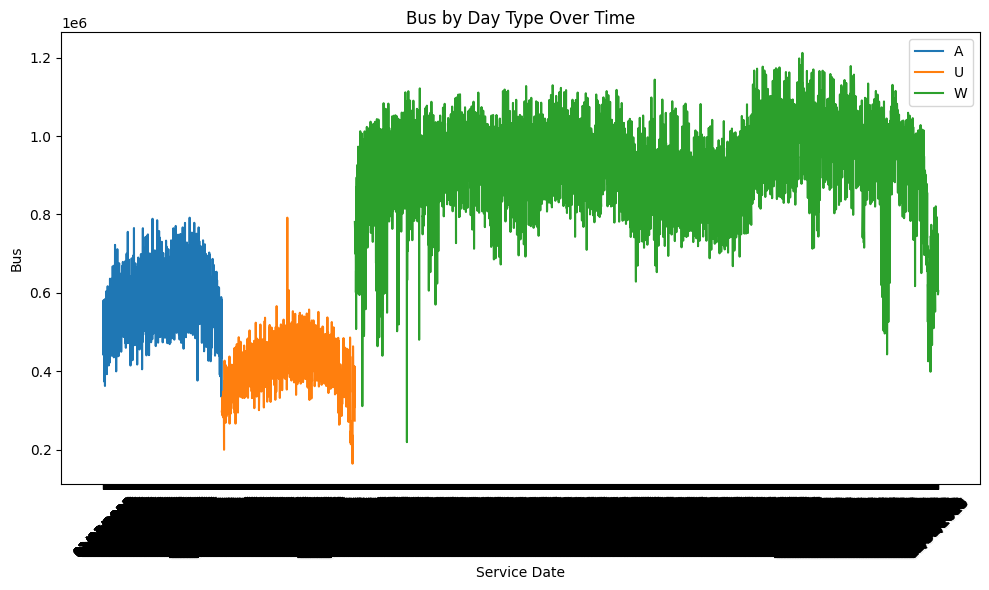

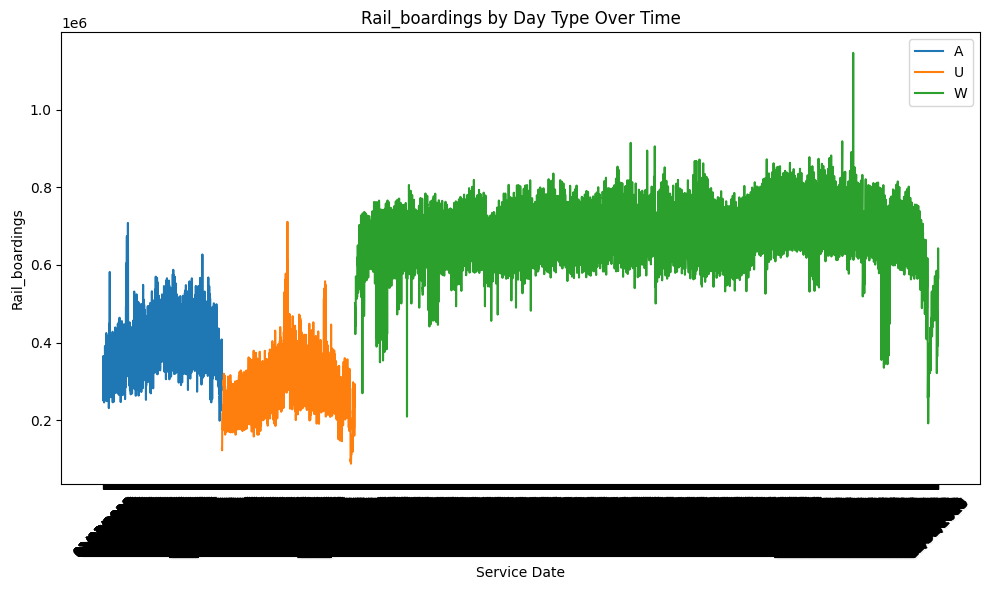

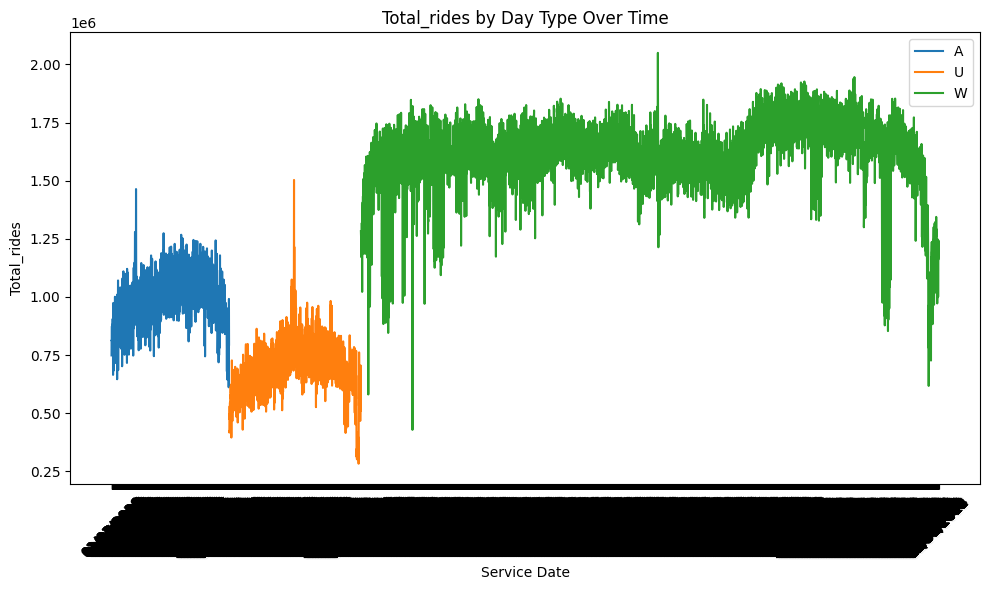

Summary of data processed successfully:
     day_type service_date       bus  rail_boardings  total_rides
0           A   01/02/2010  484655.0        264011.0     748666.0
1           A   01/02/2016  448859.0        365509.0     814368.0
2           A   01/03/2004  560436.0        250130.0     810566.0
3           A   01/03/2009  580506.0        293634.0     874140.0
4           A   01/03/2015  441327.0        340135.0     781462.0
...       ...          ...       ...             ...          ...
6477        W   12/31/2010  609114.0        391713.0    1000827.0
6478        W   12/31/2012  672602.0        490998.0    1163600.0
6479        W   12/31/2013  595963.0        565346.0    1161309.0
6480        W   12/31/2014  599316.0        642981.0    1242297.0
6481        W   12/31/2015  604409.0        565772.0    1170181.0

[6482 rows x 5 columns]


<ipython-input-11-121e03e87830>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['day_type'] = encoder.fit_transform(X['day_type'])


In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt


# Function to load and process data
def process_cta_data(file_path):
    # Load data
    file_path = os.path.join('/content/drive/MyDrive/', file_path)
    data = pd.read_csv(file_path)

    # Group data by 'day_type', 'service_date' and calculate mean
    summary = data.groupby(['day_type', 'service_date'])[['bus', 'rail_boardings', 'total_rides']].mean().reset_index()

    # Plotting
    for column in ['bus', 'rail_boardings', 'total_rides']:
        plt.figure(figsize=(10, 6))
        for day_type, group in summary.groupby('day_type'):
            plt.plot(group['service_date'], group[column], label=day_type)
        plt.title(f'{column.capitalize()} by Day Type Over Time')
        plt.xlabel('Service Date')
        plt.ylabel(column.capitalize())
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Saving the result to an Excel file
    summary.to_excel('cta_ridership_summary.xlsx', index=False)

    return summary

# Main execution block
def main():
    file_name = 'cta-ridership-daily-boarding-totals-1.csv'

    # Process the data
    try:
        summary = process_cta_data(file_name)
        print("Summary of data processed successfully:")
        print(summary)
    except Exception as e:
        print(f"An error occurred: {e}")

      #Classifier Section --------
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import LabelEncoder

    # Prepare dataset for the classifier
    X = summary[['day_type', 'bus']]

    # Encode the 'day_type' column
    encoder = LabelEncoder()
    X['day_type'] = encoder.fit_transform(X['day_type'])

    y = summary['total_rides']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

# Run the main function
main()

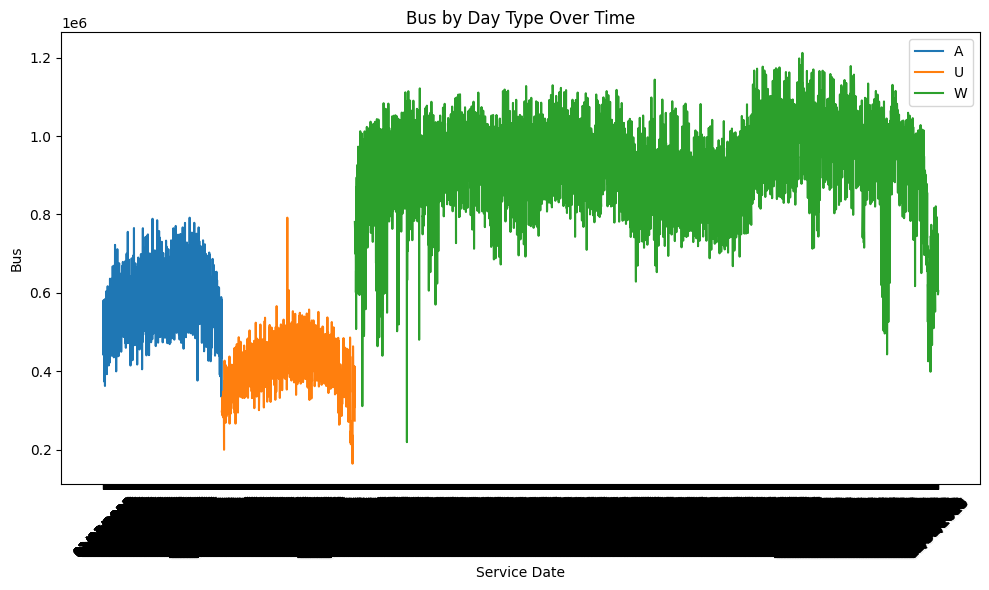

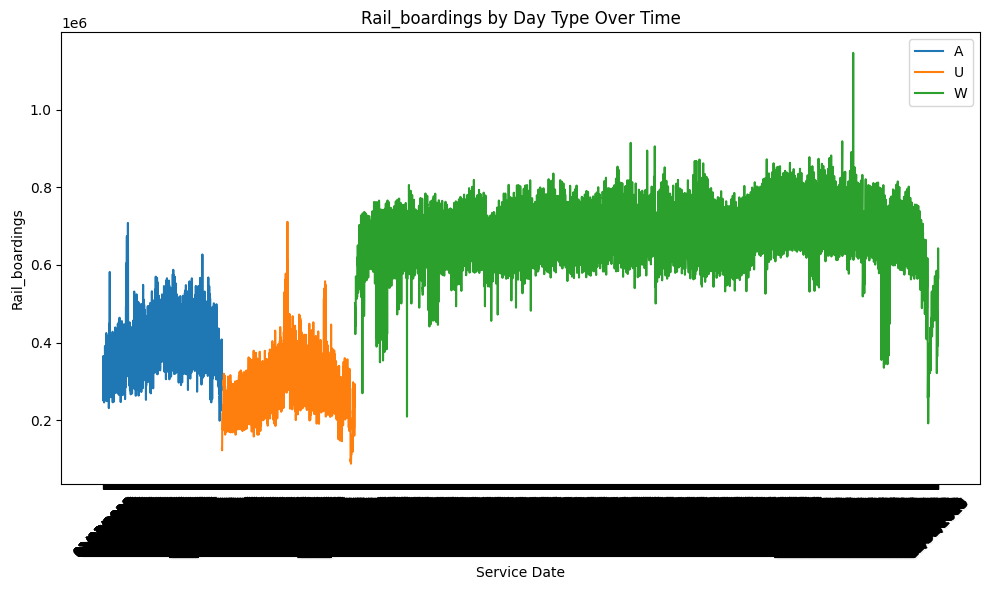

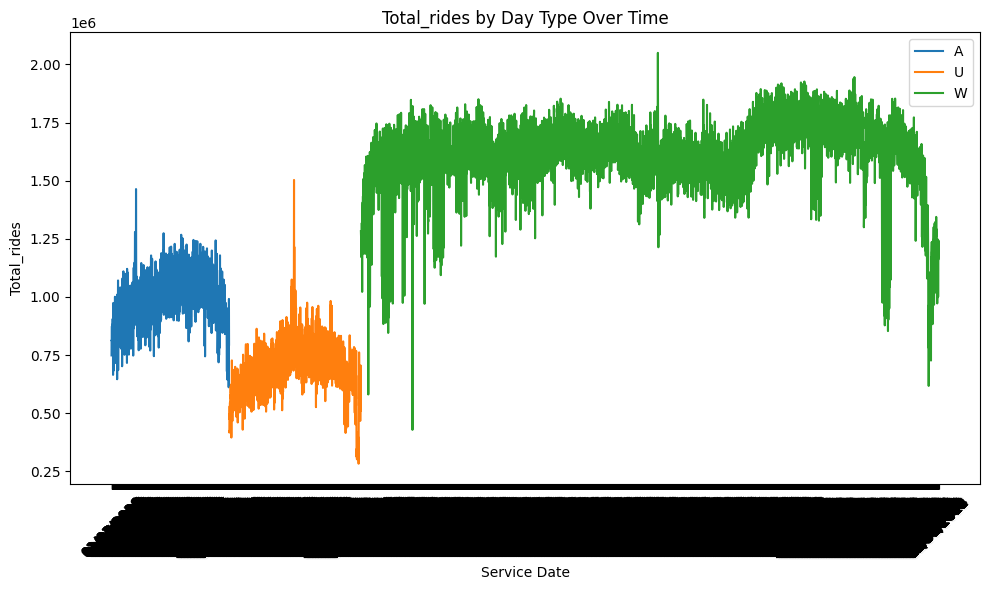

Summary of data processed successfully:
     day_type service_date       bus  rail_boardings  total_rides
0           A   01/02/2010  484655.0        264011.0     748666.0
1           A   01/02/2016  448859.0        365509.0     814368.0
2           A   01/03/2004  560436.0        250130.0     810566.0
3           A   01/03/2009  580506.0        293634.0     874140.0
4           A   01/03/2015  441327.0        340135.0     781462.0
...       ...          ...       ...             ...          ...
6477        W   12/31/2010  609114.0        391713.0    1000827.0
6478        W   12/31/2012  672602.0        490998.0    1163600.0
6479        W   12/31/2013  595963.0        565346.0    1161309.0
6480        W   12/31/2014  599316.0        642981.0    1242297.0
6481        W   12/31/2015  604409.0        565772.0    1170181.0

[6482 rows x 5 columns]
              precision    recall  f1-score   support

        High       0.99      0.98      0.99       645
         Low       1.00      1.00 

In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Function to load and process data
def process_cta_data(file_path):
    # Load data
    file_path = os.path.join('/content/drive/MyDrive/', file_path)
    data = pd.read_csv(file_path)

    # Group data by 'day_type', 'service_date' and calculate mean
    summary = data.groupby(['day_type', 'service_date'])[['bus', 'rail_boardings', 'total_rides']].mean().reset_index()

    # Plotting
    for column in ['bus', 'rail_boardings', 'total_rides']:
        plt.figure(figsize=(10, 6))
        for day_type, group in summary.groupby('day_type'):
            plt.plot(group['service_date'], group[column], label=day_type)
        plt.title(f'{column.capitalize()} by Day Type Over Time')
        plt.xlabel('Service Date')
        plt.ylabel(column.capitalize())
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Saving the result to an Excel file
    summary.to_excel('cta_ridership_summary.xlsx', index=False)

    return summary

def train_classifier(data):
    # Creating categories for 'total_rides'
    thresholds = data['total_rides'].quantile([0.33, 0.66]).tolist()
    data['ride_category'] = pd.cut(data['total_rides'], bins=[-1, thresholds[0], thresholds[1], float('inf')],
                                   labels=['Low', 'Medium', 'High'])

    # Preparing data for classification
    X = data[['bus', 'rail_boardings']]  # features
    y = data['ride_category']            # target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Training a decision tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Evaluating the classifier
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(report)

    return clf

# Main execution block
def main():
    file_name = 'cta-ridership-daily-boarding-totals-1.csv'

    # Process the data
    try:
        summary = process_cta_data(file_name)
        print("Summary of data processed successfully:")
        print(summary)

        # Train and evaluate classifier
        classifier = train_classifier(summary)
    except Exception as e:
        print(f"An error occurred: {e}")

# Run the main function
main()
